# K Means Clustering Algorithms Implementation

In [1]:
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np

%matplotlib inline 

In [4]:
X ,y = make_blobs(n_samples = 1000 , centers= 4,n_features = 2,random_state= 23)
X

array([[ 4.94837435, -2.62641531],
       [-4.9548111 ,  3.8959314 ],
       [ 1.07483352, 10.90768681],
       ...,
       [ 4.21281249, -5.88959571],
       [ 0.24256669, 10.32418709],
       [-5.68213827, -0.95009827]])

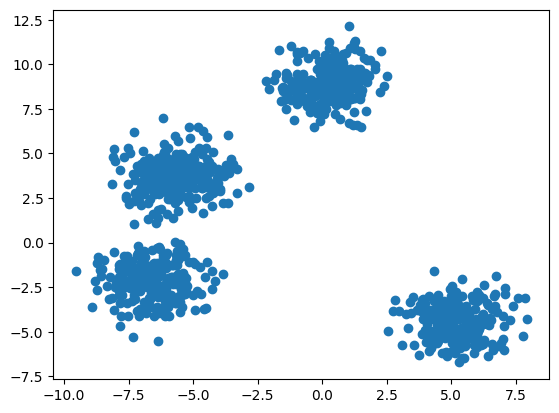

In [8]:
plt.scatter(X[:,0],X[:,1])

In [9]:
from sklearn.model_selection import train_test_split 
X_train , X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [11]:
from sklearn.cluster import KMeans

##Elbow method to select K value 
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [12]:
wcss

[38706.367580796315,
 17588.886106643175,
 4705.675322704987,
 1448.1860170427751,
 1324.8423738392219,
 1198.3012455790129,
 1076.5322437887971,
 946.6559804653828,
 873.8866406896692,
 791.4165512551348]

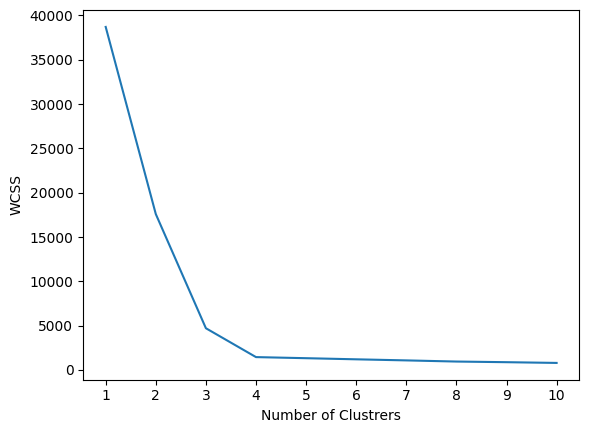

In [15]:
#Plotting elbow cureve ,

plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()



In [16]:
kmeans = KMeans(n_clusters=4,init = 'k-means++')

In [17]:
y_lables = kmeans.fit_predict(X_train)

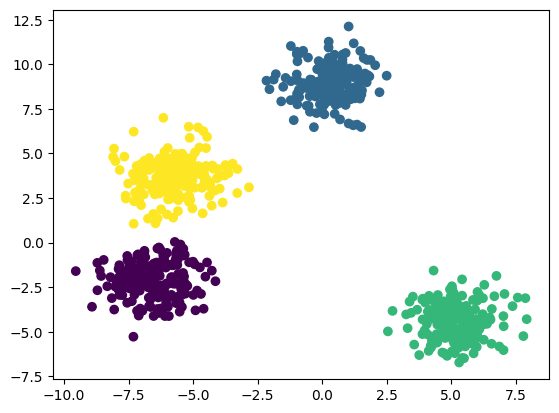

In [18]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_lables)

In [ ]:
# !pip install Kneed

In [21]:
from kneed import KneeLocator 
k1 = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
k1.elbow

3

In [22]:
from sklearn.metrics import silhouette_score 

In [26]:
silhouette_coeff =[]

for k in range(2,11):
    kmeans = KMeans(n_clusters = k , init = 'k-means++')
    kmeans.fit(X_train)
    score = silhouette_score(X_train,kmeans.labels_)
    silhouette_coeff.append(score)
silhouette_coeff

[0.47365474858136813,
 0.716006559615034,
 0.7568261354065811,
 0.6483048401789291,
 0.5492921025532912,
 0.4645943980424869,
 0.3403142967953429,
 0.45633120921290077,
 0.3520423824871301]

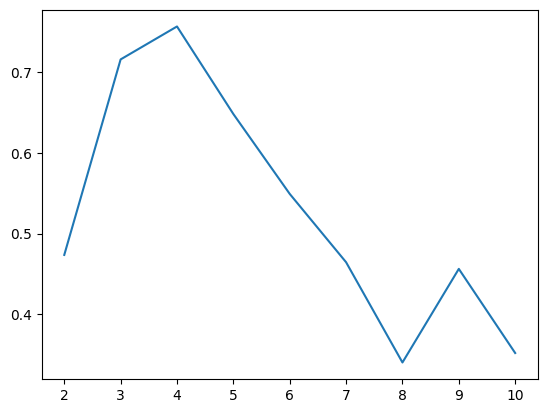

In [27]:
plt.plot(range(2,11),silhouette_coeff)

In [ ]:
.